### Load and merge datasets 
Need some fields from tmdb_5000_movies.csv and all_movie.csv merged into
OMdb_mojo_clean.csv. OMdb_mojo_clean.csv is the master dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt
from dython import nominal


In [2]:
OMdb = pd.read_csv('data/OMdb_mojo_clean.csv', na_values = ['NaN', 'inf'])

In [3]:
tmdb = pd.read_csv('data/tmdb_5000_movies.csv', na_values = ['NaN', 'inf'])

In [4]:
all_movie = pd.read_csv('data/all_movie.csv', na_values = ['NaN', 'inf'])

From all_movie.csv, merge Writer1 through Writer4 into OMdb_mojo_clean.csv
for matching movies by “Title” in all_movie.csv

In [5]:
movie_writers = all_movie.loc[:, (all_movie.columns.str.startswith('Write')) | (all_movie.columns == 'Title')]

In [6]:
OMdb = OMdb.merge(movie_writers, how = 'left', left_on = 'Title', right_on = 'Title')

In [7]:
OMdb.columns

Index(['Actors', 'Awards', 'BoxOffice', 'Country', 'DVD', 'Director', 'Genre',
       'IMdb_ID', 'IMdb_score', 'Language', 'Metascore', 'Plot', 'Production',
       'RT_score', 'Rated', 'Released', 'Runtime', 'TMdb_id', 'Title', 'Type',
       'Website', 'Year', 'actor_1', 'actor_2', 'awards', 'bo_year',
       'bo_year_rank', 'director_1', 'director_2', 'domestic-gross',
       'domestic-pct', 'imdbVotes', 'itunes_id', 'logBoxOffice', 'mojo_title',
       'nominations', 'num_actor', 'num_director', 'num_genre', 'num_lang',
       'oscar_noms', 'oscar_wins', 'overseas-gross', 'overseas-pct',
       'search_strs', 'studio', 'titles', 'worldwide-gross', 'years',
       'Writer 1', 'Writer 2', 'Writer 3', 'Writer 4'],
      dtype='object')

From tmdb_5000_movies.csv merge “budget” field into OMdb_mojo_clean.csv by
matching movie “title”

In [8]:
tmdb_new = tmdb[['title', 'budget']]

In [9]:
OMdb = OMdb.merge(tmdb_new, how = 'left', left_on = 'Title', right_on = 'title')

In [10]:
OMdb.drop(columns = ['title'], inplace = True)

From Cast1 to Cast 6 all_movie.csv merge into OMdb_mojo_clean.csv by
matching “Title”

In [11]:
movie_casts = all_movie.loc[:, (all_movie.columns.str.startswith('Cast')) | (all_movie.columns == 'Title')]

In [12]:
OMdb = OMdb.merge(movie_casts, how = 'left', left_on = 'Title', right_on = 'Title')

In [13]:
OMdb.shape

(3564, 60)

### Data Preprocessing 

 In OMdb_mojo.clean.csv, clean up the “nan” and “inf” and set them to 0

In [14]:
OMdb._get_numeric_data().isnull().sum().sort_values(ascending = False).head(10)

BoxOffice         1072
logBoxOffice      1072
budget             968
overseas-gross      65
bo_year_rank        53
domestic-gross       8
overseas-pct         0
domestic-pct         0
IMdb_score           0
Metascore            0
dtype: int64

In [15]:
OMdb.loc[OMdb['BoxOffice'].isnull(), 'BoxOffice'] = 0

In [16]:
OMdb.loc[OMdb['logBoxOffice'].isnull(), 'logBoxOffice'] = 0

In [17]:
OMdb.loc[OMdb['budget'].isnull(), 'budget'] = 0

In [18]:
OMdb.loc[OMdb['overseas-gross'].isnull(), 'overseas-gross'] = 0

In [19]:
OMdb.loc[OMdb['bo_year_rank'].isnull(), 'bo_year_rank'] = 0

In [20]:
OMdb.loc[OMdb['domestic-gross'].isnull(), 'domestic-gross'] = 0

In [21]:
OMdb._get_numeric_data().isnull().sum().sort_values(ascending = False).head(10)

budget          0
years           0
IMdb_score      0
Metascore       0
RT_score        0
Runtime         0
Year            0
awards          0
bo_year         0
bo_year_rank    0
dtype: int64

In [22]:
OMdb = OMdb.fillna('0')

In [23]:
OMdb.isnull().sum()

Actors             0
Awards             0
BoxOffice          0
Country            0
DVD                0
Director           0
Genre              0
IMdb_ID            0
IMdb_score         0
Language           0
Metascore          0
Plot               0
Production         0
RT_score           0
Rated              0
Released           0
Runtime            0
TMdb_id            0
Title              0
Type               0
Website            0
Year               0
actor_1            0
actor_2            0
awards             0
bo_year            0
bo_year_rank       0
director_1         0
director_2         0
domestic-gross     0
domestic-pct       0
imdbVotes          0
itunes_id          0
logBoxOffice       0
mojo_title         0
nominations        0
num_actor          0
num_director       0
num_genre          0
num_lang           0
oscar_noms         0
oscar_wins         0
overseas-gross     0
overseas-pct       0
search_strs        0
studio             0
titles             0
worldwide-gro

Drop all records in OMdb_mojo_clean.csv that have budget = 0 or empty OR if
revenue = 0 or empty

In [24]:
OMdb = OMdb[(OMdb[['budget', 'worldwide-gross']] != 0).all(axis =1)]

In [25]:
OMdb.shape

(2552, 60)

Perform hot encoding for all the non-numeric data columns in OMdb_mojo_clean.csv,
need to have the data ready to be fed to sci-kit library calls for logistic regression, KNN, SVM etc.

In [26]:
cat_cols = np.array(pd.DataFrame(OMdb.dtypes[OMdb.dtypes == 'object']).index)

In [27]:
ohe = OneHotEncoder(drop = 'first')

In [28]:
ohe_array = ohe.fit_transform(OMdb[cat_cols]).toarray()

In [29]:
ohe_OMdb = pd.DataFrame(ohe_array, index = OMdb.index, columns = ohe.get_feature_names())

In [30]:
ohe_OMdb.head()

,"x0_Aaron Paul, Dominic Cooper, Imogen Poots, Kid Cudi","x0_Aaron Taylor-Johnson, Chloë Grace Moretz, Morris Chestnut, Claudia Lee","x0_Adam Sandler, Kevin James, Michelle Monaghan, Peter Dinklage","x0_Adewale Akinnuoye-Agbaje, Christopher Eccleston, Grégory Fitoussi, Joseph Gordon-Levitt","x0_Adrien Brody, Topher Grace, Alice Braga, Walton Goggins","x0_Alan Howard, Noel Appleby, Sean Astin, Sala Baker","x0_Alberto Reyes, Julio Oscar Mechoso, Gustavo Sánchez Parra, Adrian Alonso","x0_Alexander Skarsgård, Rory J. Saper, Christian Stevens, Christoph Waltz","x0_Andrew Garfield, Emma Stone, Jamie Foxx, Dane DeHaan","x0_Andrew Garfield, Emma Stone, Rhys Ifans, Denis Leary",...,x33_Ving Rhames,x33_Wagner Moura,x33_Walter Brennan,x33_Wang Xueqin,x33_Warwick Davis,x33_William H. Macy,x33_William Kircher,x33_William Lee Scott,x33_William Sadler,x33_Ziyi Zhang
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
OMdb_drop_col = OMdb.drop(columns = cat_cols)

In [32]:
OMdb_ohed = pd.concat([OMdb_drop_col, ohe_OMdb], axis = 1)

In [33]:
OMdb_ohed.head()

,BoxOffice,IMdb_score,Metascore,RT_score,Runtime,Year,awards,bo_year,bo_year_rank,domestic-gross,...,x33_Ving Rhames,x33_Wagner Moura,x33_Walter Brennan,x33_Wang Xueqin,x33_Warwick Davis,x33_William H. Macy,x33_William Kircher,x33_William Lee Scott,x33_William Sadler,x33_Ziyi Zhang
1,363995937.0,74.0,77.0,95.0,106.0,2016,31.0,2016.0,5.0,364000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,363995937.0,74.0,77.0,95.0,106.0,2016,31.0,2016.0,5.0,364000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,363995937.0,74.0,77.0,95.0,106.0,2016,31.0,2016.0,5.0,364000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,363995937.0,74.0,77.0,95.0,106.0,2016,31.0,2016.0,5.0,364000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,363995937.0,74.0,77.0,95.0,106.0,2016,31.0,2016.0,5.0,364000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 Need correlation matrix for at least these features:
 
    Awards Director Genre IMdb_score Production Rated Writer 4 Writer 3
    Runtime actor_1
    actor_2 worldwide-gross studios oscar_noms oscar_wins writer2
    overseas-gross awards director_1 director_2 imdb_votes nomination writer1 language

In [34]:
corr_df = OMdb[['Awards', 'Runtime', 'overseas-gross', 'Director', 'actor_1','awards', 'Genre', 'actor_2',
               'director_1', 'IMdb_score', 'worldwide-gross', 'director_2', 'Production', 'studio',
               'imdbVotes','Rated', 'oscar_noms', 'nominations','Writer 4', 'oscar_wins', 'Writer 1',
               'Writer 3', 'Writer 2', 'Language']]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


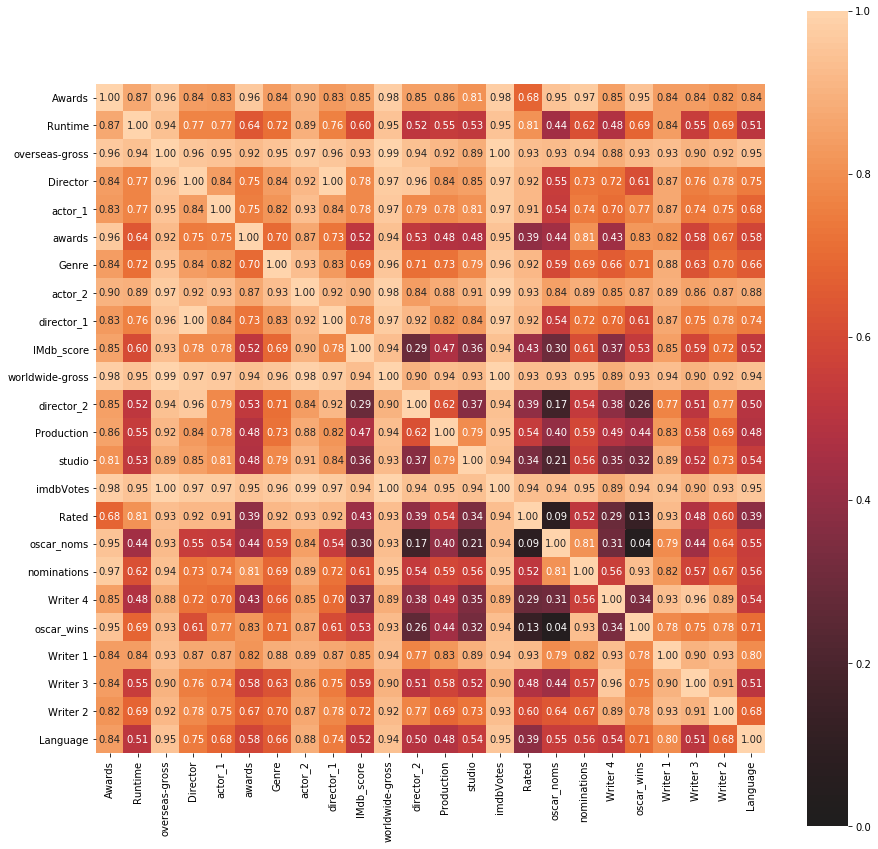

{'corr':                    Awards   Runtime  overseas-gross  Director   actor_1  \
 Awards           1.000000  0.870457        0.964698  0.836097  0.831778   
 Runtime          0.870457  1.000000        0.942638  0.771241  0.768584   
 overseas-gross   0.964698  0.942638        1.000000  0.958386  0.951170   
 Director         0.836097  0.771241        0.958386  1.000000  0.842621   
 actor_1          0.831778  0.768584        0.951170  0.842621  1.000000   
 awards           0.961122  0.642079        0.924404  0.746105  0.752054   
 Genre            0.839187  0.715777        0.950495  0.840027  0.819679   
 actor_2          0.898681  0.890864        0.968788  0.918130  0.934852   
 director_1       0.833080  0.760996        0.958534  0.999360  0.838312   
 IMdb_score       0.853521  0.601751        0.930224  0.782990  0.782305   
 worldwide-gross  0.978637  0.949340        0.992484  0.969839  0.965663   
 director_2       0.845657  0.519980        0.940920  0.962524  0.787301   
 Pro

In [35]:
nominal.associations(corr_df, nominal_columns = 'all', figsize=(15, 15), annot =True)

Covariance matrix to determine which features are similar and can be dropped from model input

In [36]:
OMdb.cov()

,BoxOffice,IMdb_score,Metascore,RT_score,Runtime,Year,awards,bo_year,bo_year_rank,domestic-gross,...,num_director,num_genre,num_lang,oscar_noms,oscar_wins,overseas-gross,overseas-pct,worldwide-gross,years,budget
BoxOffice,1.575019e+16,4.057107e+08,6.825881e+08,1.048654e+09,1.066293e+09,1.905860e+08,1.408515e+09,1.974298e+08,-2.096414e+09,1.260806e+16,...,7.958634e+06,1.255745e+07,9.380210e+06,1.430968e+07,2.196873e+07,2.096443e+16,2.393360e+08,3.357215e+16,1.933846e+08,3.938941e+15
IMdb_score,4.057107e+08,9.972911e+01,1.374285e+02,2.030340e+02,7.305809e+01,-1.325043e+01,1.709029e+02,-4.806560e+00,-8.209431e+01,4.822706e+08,...,5.746299e-01,5.385842e-01,1.619734e+00,1.183372e+00,6.263649e+00,8.208033e+08,1.509805e+01,1.303102e+09,-1.240344e+01,1.019935e+07
Metascore,6.825881e+08,1.374285e+02,2.966077e+02,4.003532e+02,8.480927e+01,-3.003434e+01,2.975794e+02,-1.380519e+01,-1.554250e+02,8.457059e+08,...,1.457265e+00,1.474143e+00,1.859950e+00,2.258165e+00,1.043856e+01,1.292652e+09,-6.251073e+00,2.138327e+09,-2.871579e+01,-2.597734e+06
RT_score,1.048654e+09,2.030340e+02,4.003532e+02,6.246886e+02,9.642866e+01,-4.443328e+01,3.723201e+02,-1.527748e+01,-2.032322e+02,1.223737e+09,...,2.030154e+00,1.776855e+00,2.634201e+00,3.431495e+00,1.277151e+01,1.795011e+09,-1.150069e+01,3.018760e+09,-4.326746e+01,-5.567352e+07
Runtime,1.066293e+09,7.305809e+01,8.480927e+01,9.642866e+01,6.682534e+02,-2.525384e+01,3.527478e+02,-1.312551e+01,-2.026670e+02,9.423209e+08,...,-8.401893e-01,-3.088871e+00,6.906912e+00,2.094516e+00,1.762898e+01,1.996154e+09,5.243740e+01,2.938355e+09,-2.314580e+01,4.575621e+08
Year,1.905860e+08,-1.325043e+01,-3.003434e+01,-4.443328e+01,-2.525384e+01,5.604133e+01,-3.120674e+01,3.889953e+01,8.567006e+00,3.970192e+07,...,-7.357469e-01,9.615490e-01,-9.198437e-01,-1.237089e-01,-2.621895e+00,2.454762e+08,3.377459e+01,2.852184e+08,5.542780e+01,1.805350e+08
awards,1.408515e+09,1.709029e+02,2.975794e+02,3.723201e+02,3.527478e+02,-3.120674e+01,1.025522e+03,-2.841578e+01,-2.801566e+02,1.771836e+09,...,5.153453e-01,-2.023649e+00,4.571612e+00,-8.730795e-02,3.673507e+01,3.140215e+09,1.337165e+01,4.912025e+09,-2.650544e+01,9.236154e+07
bo_year,1.974298e+08,-4.806560e+00,-1.380519e+01,-1.527748e+01,-1.312551e+01,3.889953e+01,-2.841578e+01,4.565001e+01,3.580341e+01,5.152719e+07,...,-9.862258e-02,1.000804e+00,-5.544749e-01,8.357777e-02,-2.169352e+00,2.365143e+08,3.097502e+01,2.880807e+08,3.846287e+01,1.316117e+08
bo_year_rank,-2.096414e+09,-8.209431e+01,-1.554250e+02,-2.032322e+02,-2.026670e+02,8.567006e+00,-2.801566e+02,3.580341e+01,1.201148e+03,-2.707524e+09,...,-1.864973e+00,-1.314859e-01,-5.667105e+00,-1.690184e+00,-1.129165e+01,-4.890555e+09,-1.508844e+02,-7.598052e+09,9.042858e+00,-1.148665e+09
domestic-gross,1.260806e+16,4.822706e+08,8.457059e+08,1.223737e+09,9.423209e+08,3.970192e+07,1.771836e+09,5.152719e+07,-2.707524e+09,1.579156e+16,...,9.158783e+06,-4.158183e+06,1.758754e+06,1.234055e+07,7.268612e+07,2.818739e+16,2.475395e+08,4.397899e+16,3.871979e+07,4.170904e+15


### EDA 
All graphs should be based on the OMdb_mojo_clean.csv (after the merges from the above requirements).

1. Graph #1 to Plot revenue by genre. Revenue comes from “worldwide-gross” and “Genre” in OMDb_mojo_clean.csv. Now some of the genre categories are multiples, you can count each combination as a unique category OR just pick one category in the list as the genre. So if a data point has Genre = Action, Comedy, Animation, we can pick “Action” or “Comedy” or “Animation” as its genre

In [37]:
OMdb['genre_1'] = [i.split(',')[0] for i in OMdb['Genre'] ]

In [38]:
genre_revenue_df= pd.DataFrame(OMdb.groupby(['genre_1']).sum()['worldwide-gross'])

In [39]:
genre_revenue_df

,worldwide-gross
genre_1,
Action,5.700867e+11
Adventure,1.884448e+11
Animation,1.472256e+11
Biography,2.708000e+09
Comedy,6.672800e+09
Crime,1.378376e+10
Drama,5.985400e+10
Romance,1.023200e+09
Short,3.191250e+10


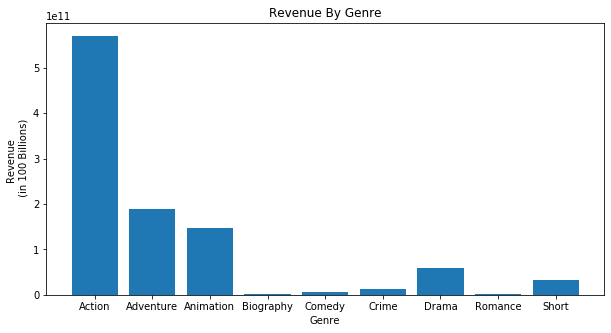

In [40]:
plt.figure(figsize = (10, 5))
plt.bar(genre_revenue_df.index, genre_revenue_df['worldwide-gross'])
plt.title('Revenue By Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue \n (in 100 Billions)');

2. Take all the movies and bin them by the month that they are released. The year of release we do not care about. Then plot them against the revenue generated per movie. So y-axis is revenue and x-axis is the months of the year. And each month of the year contains each movie.

In [122]:
month = []
for data in OMdb['Released']:
    if data != '0':
        month.append(pd.to_datetime(data).month)
    else:
        month.append(0)
        
OMdb['month'] = month

In [116]:
OMdb['month'].value_counts()

6     407
7     388
11    324
5     288
12    266
8     232
10    139
1     132
3     108
4      94
9      83
2      66
0      25
Name: month, dtype: int64

In [117]:
month_revenue_df =pd.DataFrame(OMdb.groupby(by = ['month', 'Title']).sum()['worldwide-gross'])

In [118]:
month_revenue_df.reset_index(inplace = True)

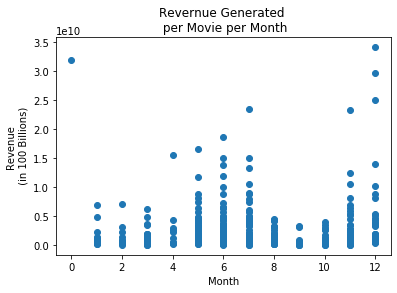

In [127]:
plt.scatter(month_revenue_df['month'], month_revenue_df['worldwide-gross'])
plt.title('Revernue Generated \n per Movie per Month')
plt.xlabel('Month')
plt.ylabel('Revenue \n (in 100 Billions)');

3. For the data points that have budget, revenue (Worldwide-gross) and director (pick director_1) filled in the merged OMDb_mojo_clean.csv..., can we calculate the percentage return on a movie? So it will be (budget/revenue) * 100% equals percentage return on a movie. I want to bin the movies by the director, so that we see which director has the highest percentage return on average. If you think a scatterplot would work better or some other chart, go ahead and do it.

In [131]:
OMdb['pct_return'] = OMdb['budget']/OMdb['worldwide-gross']*100

In [138]:
revenue_director_df = pd.DataFrame(OMdb.groupby(by=['Director']).mean()['pct_return'])

In [143]:
revenue_director_df[revenue_director_df['pct_return']> 100]

,pct_return
Director,
Andrew Dominik,200.000000
Antony Hoffman,238.805970
Carl Rinsch,115.283267
David Koepp,112.540193
Edgar Wright,125.786164
Ericson Core,125.748503
Gavin O'Connor,108.225108
George Miller,125.477314
Jonathan Lynn,228.571429


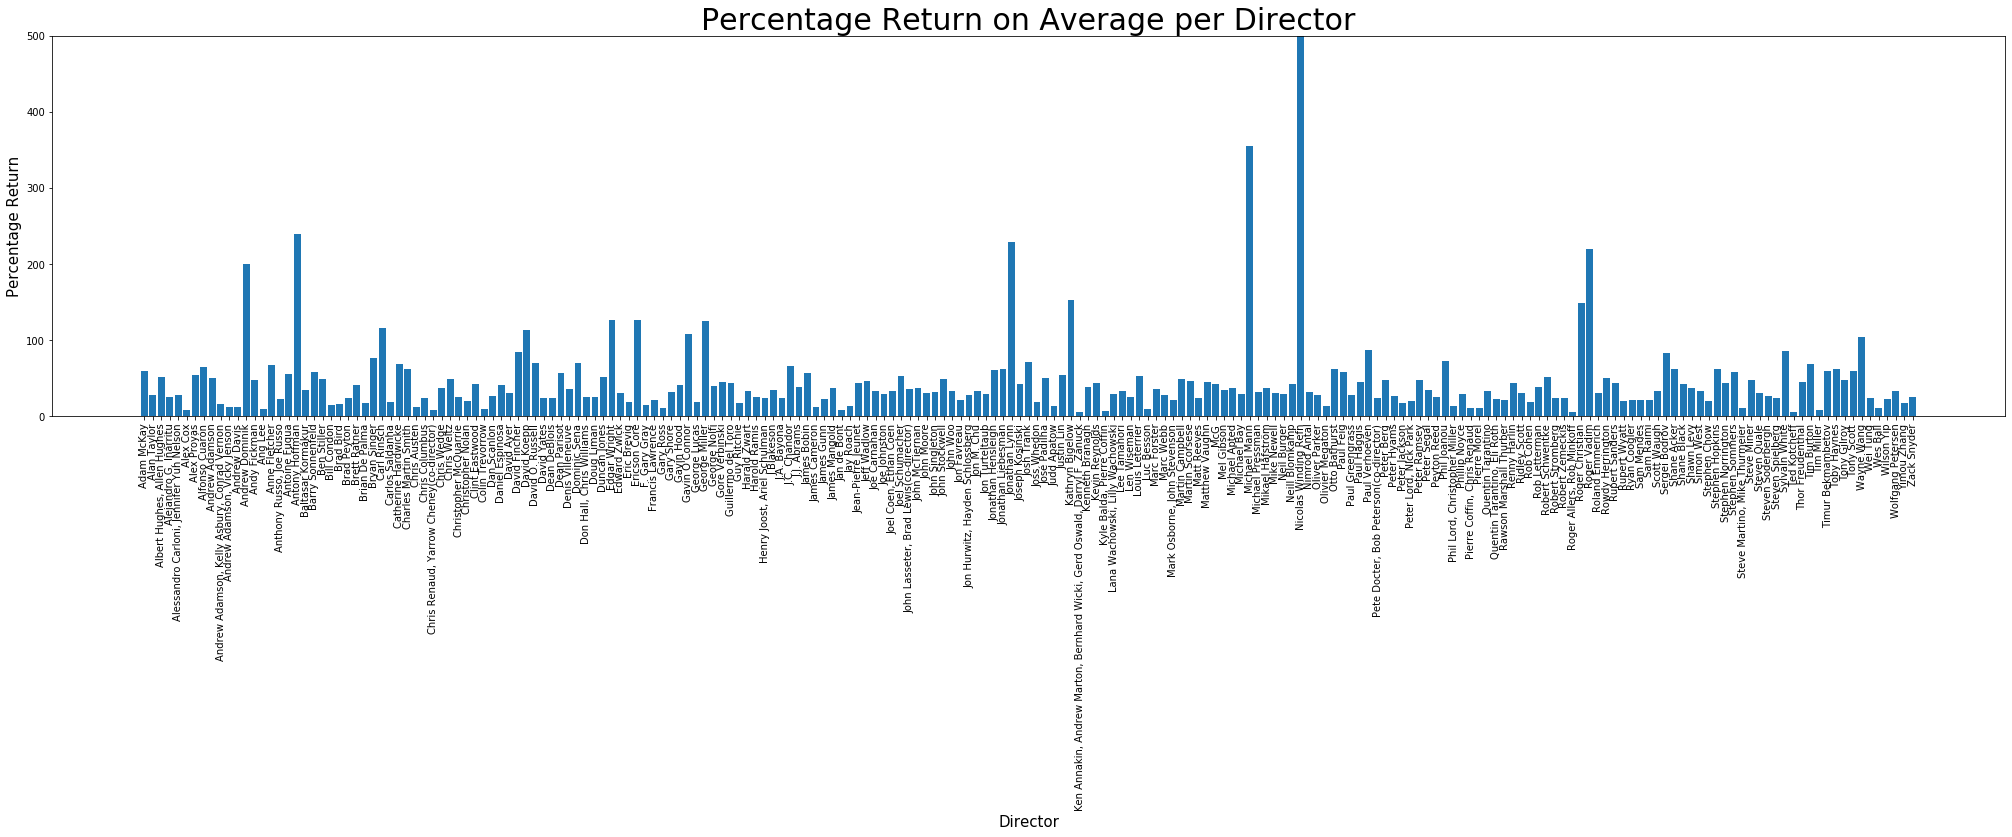

In [168]:
plt.figure(figsize = (35,7))
plt.bar(revenue_director_df.index, revenue_director_df['pct_return'])
plt.title('Percentage Return on Average per Director', fontsize = 30)
plt.ylim(0,500)
plt.xlabel('Director', fontsize = 15)
plt.ylabel('Percentage Return', fontsize = 15)
plt.xticks(rotation = 90);

4. Can we make separate scatterplots (or whatever graphs you deem useful for visualization) for:
a. Worldwide-gross to production studio
b. Worldwide-gross to # of oscar wins
c. Worldwide-gross to # of oscar nomination
d. Worldwide-gross to total # awards won
e. Worldwide-gross to actor_1
f. Worldwide-gross to writer_1

In [171]:
OMdb['Production']

1       Walt Disney Pictures
2       Walt Disney Pictures
3       Walt Disney Pictures
4       Walt Disney Pictures
5       Walt Disney Pictures
                ...         
3559            Warner Bros.
3560        TriStar Pictures
3561        TriStar Pictures
3562        TriStar Pictures
3563        TriStar Pictures
Name: Production, Length: 2552, dtype: object